<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [603]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(threshold=np.nan)
pd.set_option('display.max_columns', 500)

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

## Load data

In [604]:
house = pd.read_csv('./housing.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [605]:
house.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

* Checking data information

In [606]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

* Changing all features into lowercase

In [607]:
house.columns = map(lambda x:x.lower(), house)

***

## Stats summary of features and detection of outliers

In [608]:
house.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


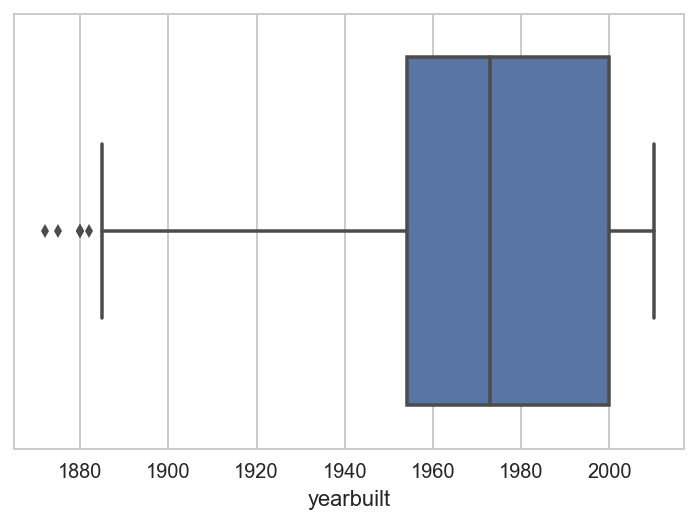

In [609]:
sns.boxplot(x = house['yearbuilt'])

* Outliers detection by finding absolute values that are more that 3 stds through a for-loop
      These values were calculated by subtracting each feature's mean from each value in that feature. 

In [610]:
outliers = []
for a in house:
    try:
        outliers.append(np.abs(house[a]-house[a].mean())<=(3*house[a].std()))
    except:
        pass
    
outliers = pd.DataFrame(outliers)
outliers= pd.DataFrame.transpose(outliers)
outliers

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
7,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


***

## EDA

* Dropping rows that are residential areas

In [611]:
house.drop(house[house['mszoning'] == 'A'].index, inplace=True)
house.drop(house[house['mszoning'] == 'C (all)'].index, inplace=True)
house.drop(house[house['mszoning'] == 'FV'].index, inplace=True)
house.drop(house[house['mszoning'] == 'I'].index, inplace=True)
house.shape

(1385, 81)

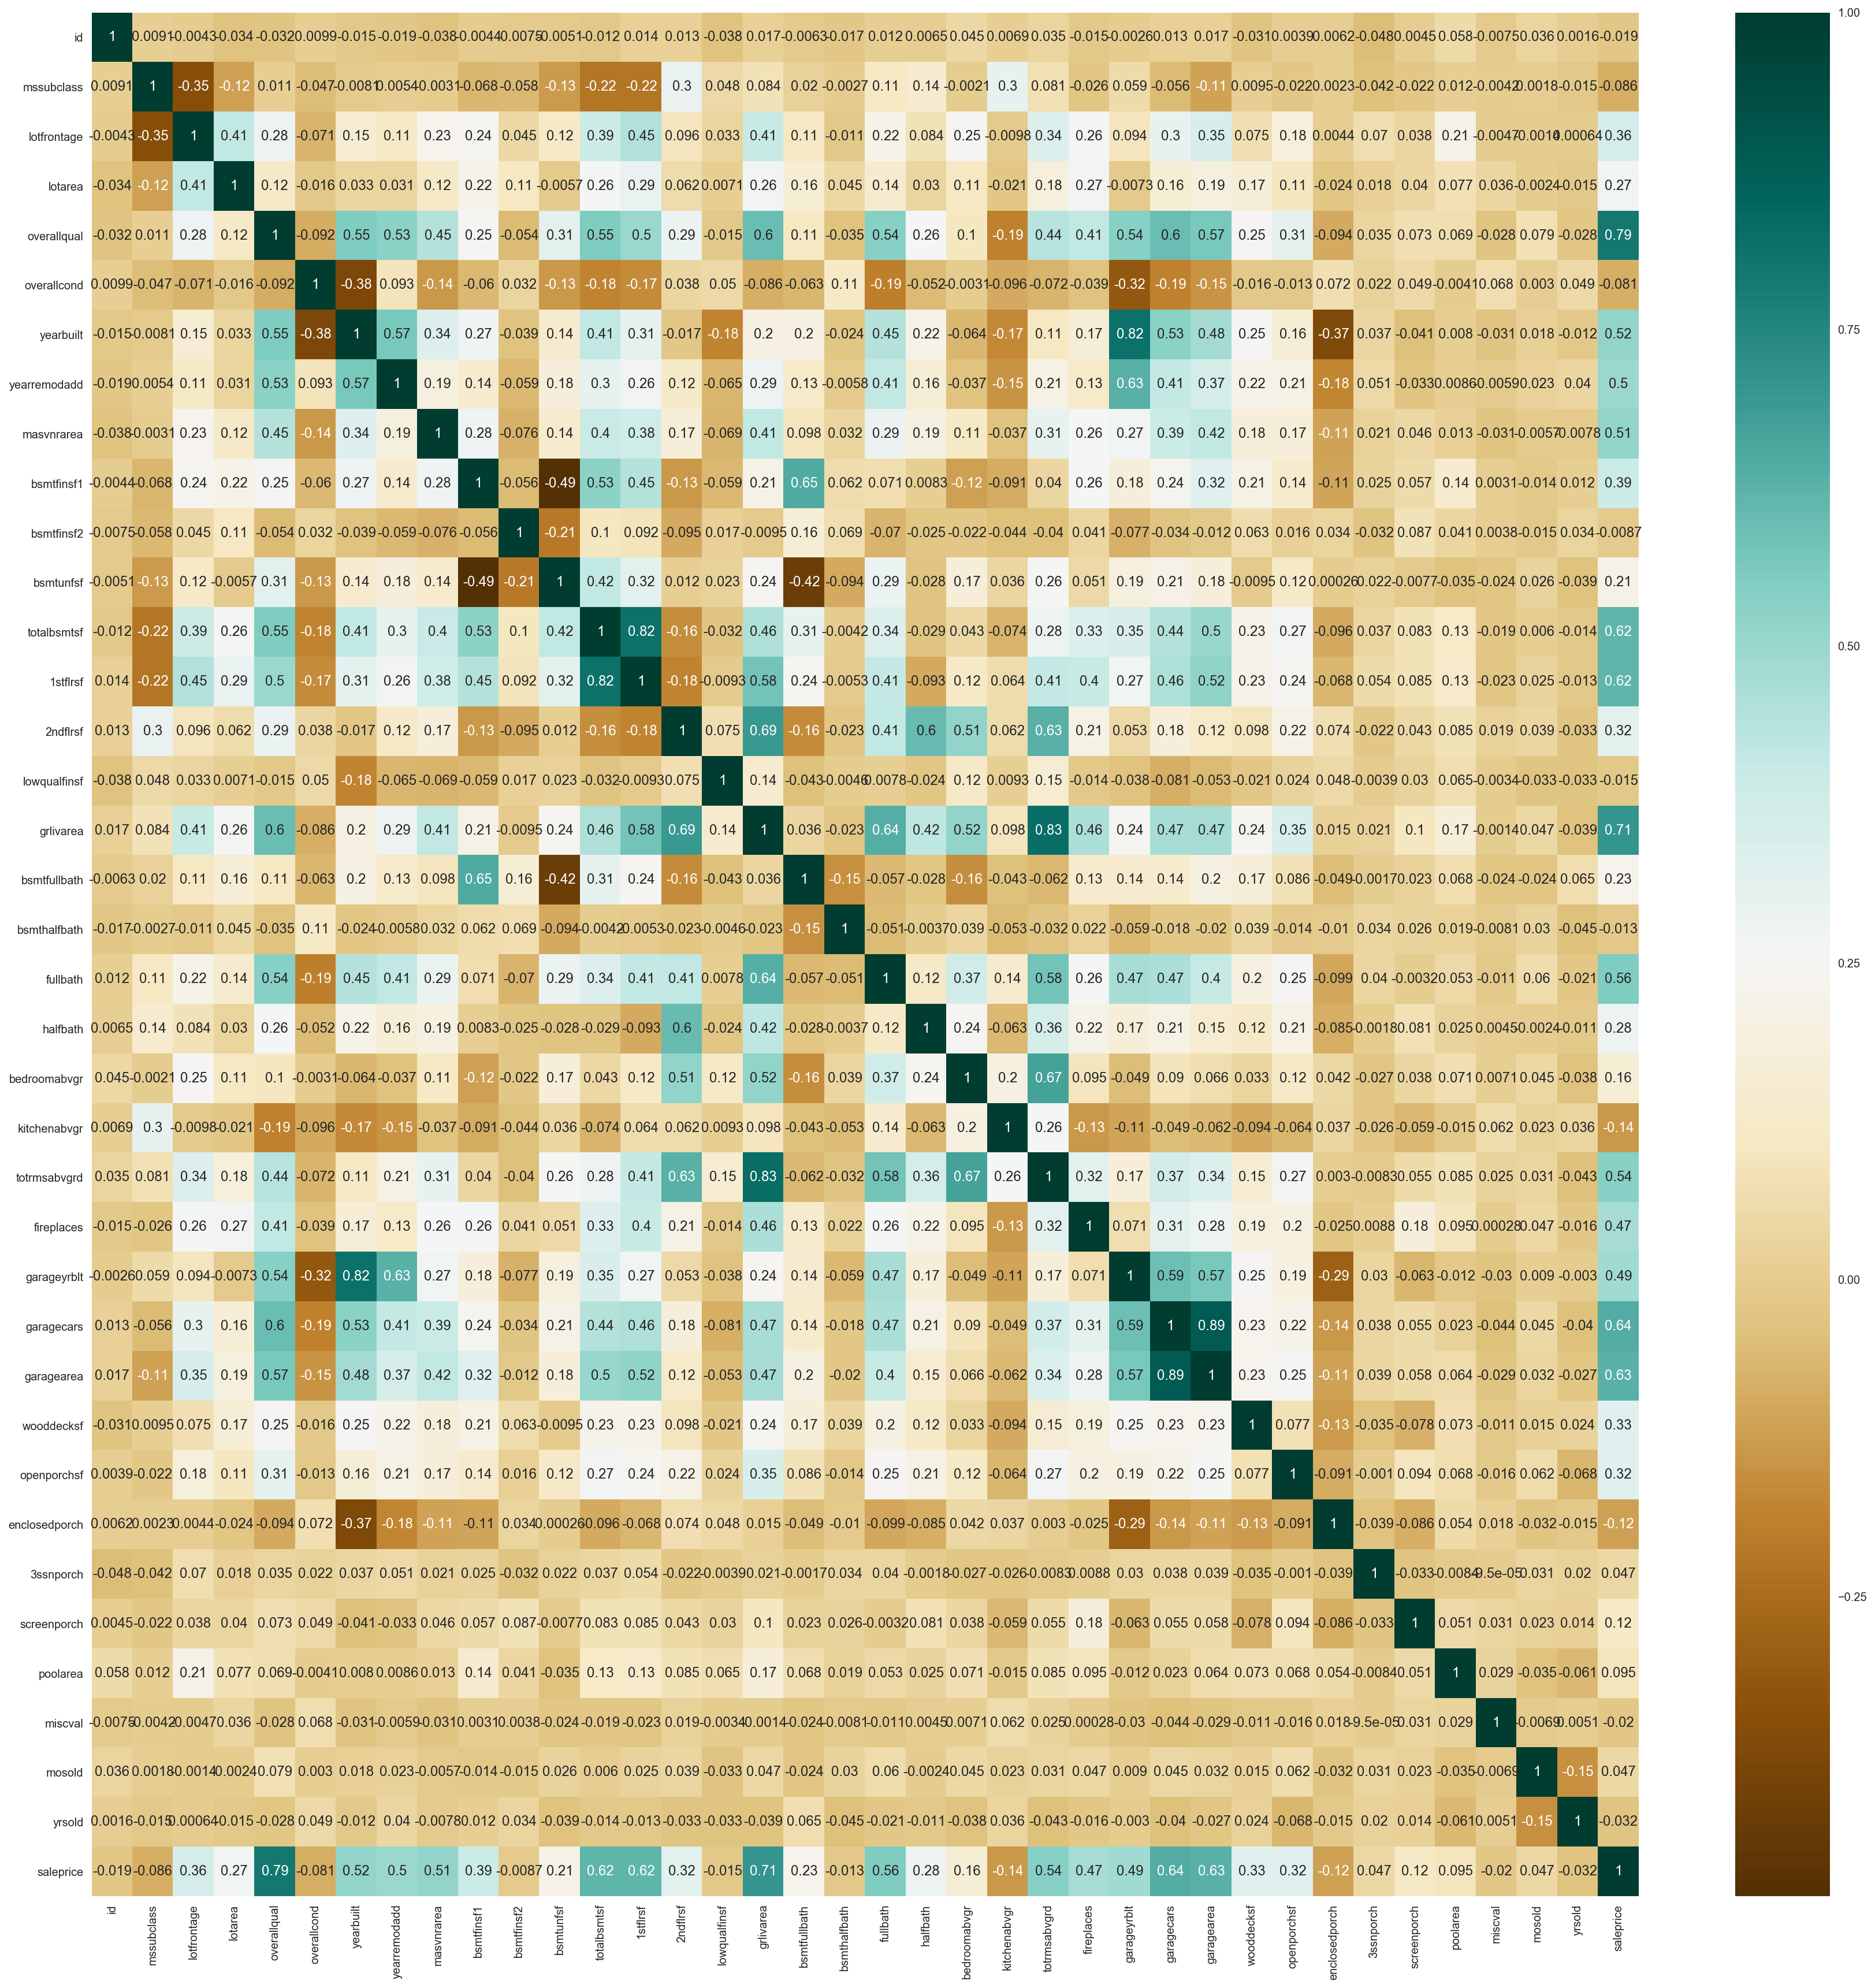

In [612]:
sns.set(rc={'figure.figsize': (30,30)})
sns.heatmap(house.corr(), annot=True, cmap='BrBG')

* Finding null values for each feature
      alley, poolqc, fence, miscfeature had more than 50% null values

In [613]:
house[house.columns[house.isnull().any()]].isnull().sum()

lotfrontage      251
alley           1320
masvnrtype         5
masvnrarea         5
bsmtqual          37
bsmtcond          37
bsmtexposure      38
bsmtfintype1      37
bsmtfintype2      38
electrical         1
fireplacequ      641
garagetype        79
garageyrblt       79
garagefinish      79
garagequal        79
garagecond        79
poolqc          1378
fence           1108
miscfeature     1333
dtype: int64

* Replacement of null values in data

In [614]:
# replace NaN values in entire dataframe with None
house.fillna(value='None', inplace=True)

# Replace None in electrical column with SBrkr as it is the most common value 
house['electrical'] = house.loc[:, 'electrical'].replace(to_replace='None', value='SBrkr')

# Replace None with O for lotfrontage
house['lotfrontage'] = house.loc[:, 'lotfrontage'].replace(to_replace='None', value=float(0))

# Change None with 0 for MasVnrArea 
house['masvnrarea'] = house.loc[:, 'masvnrarea'].replace(to_replace='None', value= float(0))

# Replace None values with 0 for garageyeblt
house['garageyrblt'] = house.loc[:, 'garageyrblt'].replace(to_replace='None', value= float(0))

* Checking for null values

In [615]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 0 to 1459
Data columns (total 81 columns):
id               1385 non-null int64
mssubclass       1385 non-null int64
mszoning         1385 non-null object
lotfrontage      1385 non-null float64
lotarea          1385 non-null int64
street           1385 non-null object
alley            1385 non-null object
lotshape         1385 non-null object
landcontour      1385 non-null object
utilities        1385 non-null object
lotconfig        1385 non-null object
landslope        1385 non-null object
neighborhood     1385 non-null object
condition1       1385 non-null object
condition2       1385 non-null object
bldgtype         1385 non-null object
housestyle       1385 non-null object
overallqual      1385 non-null int64
overallcond      1385 non-null int64
yearbuilt        1385 non-null int64
yearremodadd     1385 non-null int64
roofstyle        1385 non-null object
roofmatl         1385 non-null object
exterior1st      1385 non

___

## Creation of dummy variables

* Identify fixed characteristics in house data and extract these features into another dataframe called fixed

In [616]:
fixed = ['mssubclass', 'mszoning', 'lotfrontage', 'lotarea','street', 'alley', 'lotshape', 'landcontour',
         'utilities','lotconfig', 'landslope', 'neighborhood', 'condition1','condition2','bldgtype', 'housestyle',
         'yearbuilt', 'yearremodadd', 'roofstyle','masvnrtype','masvnrarea','foundation', 'bsmtqual', 'totalbsmtsf',
         '1stflrsf', '2ndflrsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath','fullbath', 'halfbath','bedroomabvgr',
         'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garagetype', 'garageyrblt', 'garagecars', 'garagearea',
         'poolarea','yrsold']

fixed = house[fixed]
fixed.head()

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,yearbuilt,yearremodadd,roofstyle,masvnrtype,masvnrarea,foundation,bsmtqual,totalbsmtsf,1stflrsf,2ndflrsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagetype,garageyrblt,garagecars,garagearea,poolarea,yrsold
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,BrkFace,196.0,PConc,Gd,856,856,854,1710,1,0,2,1,3,1,8,0,Attchd,2003.0,2,548,0,2008
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,None,0.0,CBlock,Gd,1262,1262,0,1262,0,1,2,0,3,1,6,1,Attchd,1976.0,2,460,0,2007
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2001,2002,Gable,BrkFace,162.0,PConc,Gd,920,920,866,1786,1,0,2,1,3,1,6,1,Attchd,2001.0,2,608,0,2008
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1915,1970,Gable,None,0.0,BrkTil,TA,756,961,756,1717,1,0,1,0,3,1,7,1,Detchd,1998.0,3,642,0,2006
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2000,2000,Gable,BrkFace,350.0,PConc,Gd,1145,1145,1053,2198,1,0,2,1,4,1,9,1,Attchd,2000.0,3,836,0,2008


* Tried to create dummy variables but was unable to proceed as MsSubClass is 'int64'. used astype dunction

In [617]:
fixed['mssubclass'] = fixed['mssubclass'].astype('object')

/Applications/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


* Create dummy variables using get_dummies function

In [618]:
fixed = pd.get_dummies(fixed)
fixed

,lotfrontage,lotarea,yearbuilt,yearremodadd,masvnrarea,totalbsmtsf,1stflrsf,2ndflrsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,poolarea,yrsold,mssubclass_20,mssubclass_30,mssubclass_40,mssubclass_45,mssubclass_50,mssubclass_60,mssubclass_70,mssubclass_75,mssubclass_80,mssubclass_85,mssubclass_90,mssubclass_120,mssubclass_160,mssubclass_180,mssubclass_190,mszoning_RH,mszoning_RL,mszoning_RM,street_Grvl,street_Pave,alley_Grvl,alley_None,alley_Pave,lotshape_IR1,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_Bnk,landcontour_HLS,landcontour_Low,landcontour_Lvl,utilities_AllPub,utilities_NoSeWa,lotconfig_Corner,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,landslope_Gtl,landslope_Mod,landslope_Sev,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Artery,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Artery,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_1Fam,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Fin,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Flat,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,masvnrtype_BrkCmn,masvnrtype_BrkFace,masvnrtype_None,masvnrtype_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtqual_Ex,bsmtqual_Fa,bsmtqual_Gd,bsmtqual_None,bsmtqual_TA,garagetype_2Types,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_None
0,65.0,8450,2003,2003,196.0,856,856,854,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,2008,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,80.0,9600,1976,1976,0.0,1262,1262,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,0,2007,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,68.0,11250,2001,2002,162.0,920,920,866,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,2008,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,60.0,9550,1915,1970,0.0,756,961,756,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,2006,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,84.0,14260,2000,2000,350.0,1145,1145,1053,2198,1,0,2,1,4,1,9,1,2000.0,3,836,0,2008,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,85.0,14115,1993,1995,0.0,796,796,566,1362,1,0,1,1,1,1,5,0,1993.0

_______________________________________________________________________________________________________________________

## Features Selection using KBest and lasso

In [619]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

* Split the data into training and testing sets according to the requirements

In [620]:
#Training set
a= house[house['yrsold'] < 2010]
y = a['saleprice']
X = fixed[fixed['yrsold'] < 2010]

#Testing set
b = house[house['yrsold'] == 2010]
yTest = b['saleprice']
XTest = fixed[fixed['yrsold'] == 2010]

* Feature selection using KBest, f_classif.

In [621]:
# Scaling using standard scaler
ss = StandardScaler()
X_fitss = ss.fit_transform(X)

XTest_fitss = ss.fit_transform(XTest)

# Fitting predictors into selectkbest model
skb_f = SelectKBest(f_classif, k=5)
skb_f.fit(X_fitss, y)

# Finding best fclass coefficient values
kbest_fclass = pd.DataFrame([cols, list(skb_f.scores_)], 
                     index=['feature','f_classif']).T.sort_values('f_classif', ascending=False)
kbest_fclass

,feature,f_classif
103,condition2_RRAn,inf
79,neighborhood_NridgHt,5.12569
78,neighborhood_NoRidge,4.1444
134,bsmtqual_Ex,3.94964
84,neighborhood_Somerst,3.41368
8,grlivarea,3.38479
101,condition2_PosN,3.30312
41,street_Pave,3.2995
40,street_Grvl,3.2995
1,lotarea,3.28119


* Features selection using KBest, chi2

In [622]:
# MinMaxScaler was used as chi2 does not accpet negative values
mm = MinMaxScaler()
X_fitmm = mm.fit_transform(X)


# Fitting predictors into selectkbest model
skb_chi2 = SelectKBest(chi2, k=5)
skb_chi2.fit(X_fitmm, y)

# Finding nest chi2 coefficient values
kbest_chi2 = pd.DataFrame([cols, list(skb_chi2.scores_)], 
                     index=['feature', 'chi2 score']).T.sort_values('chi2 score', ascending=False)
kbest_chi2

,feature,chi2 score
103,condition2_RRAn,1220
79,neighborhood_NridgHt,947.931
78,neighborhood_NoRidge,937.413
101,condition2_PosN,913.75
40,street_Grvl,912.75
84,neighborhood_Somerst,906.863
134,bsmtqual_Ex,873.861
87,neighborhood_Veenker,855.857
131,foundation_Slab,844.037
47,lotshape_IR3,832.102


* Features selection using Lasso

In [623]:
# Finding optimal alpha and fitting into model
optimal_lasso = LassoCV(n_alphas=500, cv=5, verbose=1)
optimal_lasso.fit(X_fitss, y)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

1219.88233563


..................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished


In [624]:
# Finding best lasso coefficient values 
cols = list(fixed.columns)

lasso_coefs = pd.DataFrame({'variable':cols,
                            'coef':optimal_lasso.coef_,
                            'abs_coef':np.abs(optimal_lasso.coef_)})

lasso_coefs.sort_values('abs_coef',inplace=True, ascending=False)

In [625]:
lasso_coefs

,abs_coef,coef,variable
8,27873.187277,27873.187277,grlivarea
134,13280.775631,13280.775631,bsmtqual_Ex
79,9508.880004,9508.880004,neighborhood_NridgHt
78,9093.093936,9093.093936,neighborhood_NoRidge
18,8982.079392,8982.079392,garagecars
3,7696.149286,7696.149286,yearremodadd
85,6844.913102,6844.913102,neighborhood_StoneBr
5,6253.424647,6253.424647,totalbsmtsf
2,5945.676136,5945.676136,yearbuilt
16,5288.072334,5288.072334,fireplaces


## Model Selection

### Fitting features selected from fclass into linear regression

In [626]:
fclass = kbest_fclass.iloc[1:11, 0].tolist()
print fclass

['neighborhood_NridgHt', 'neighborhood_NoRidge', 'bsmtqual_Ex', 'neighborhood_Somerst', 'grlivarea', 'condition2_PosN', 'street_Pave', 'street_Grvl', 'lotarea', 'masvnrarea']


In [627]:
# Input scaled variables into original dataframe
scaled_fclass = pd.DataFrame(X_fitss, columns = X.columns, index=X.index)
# Created dataframe for fclass features
fclass_df = scaled_fclass[['neighborhood_NoRidge', 'neighborhood_NWAmes', 'neighborhood_SawyerW',
                           '2ndflrsf', 'condition2_PosA', 'street_Grvl', 'mszoning_RM', 'lotfrontage',
                           'yearremodadd', 'garageyrblt']]

# fitting scaled variables into linear model regression
linear = LinearRegression()
linear.fit(fclass_df, y)


# R2 score
score = cross_val_score(linear, fclass_df, y, cv=5)
np.mean(score)

0.44810135600531059

### Fitting features selected from chi2 into linear regression

In [628]:
chi2 = kbest_chi2.iloc[0:10, 0].tolist()
print chi2

['condition2_RRAn', 'neighborhood_NridgHt', 'neighborhood_NoRidge', 'condition2_PosN', 'street_Grvl', 'neighborhood_Somerst', 'bsmtqual_Ex', 'neighborhood_Veenker', 'foundation_Slab', 'lotshape_IR3']


In [629]:
# Input scaled variables into original dataframe
scaled_chi2 = pd.DataFrame(X_fitmm, columns = X.columns, index=X.index)
# Created dataframe for chi2 features
chi2 = scaled_chi2[['condition2_RRAe', 'neighborhood_NoRidge', 'neighborhood_NWAmes', 
                    'condition2_PosA', 'mszoning_RM', 'neighborhood_SawyerW', 'neighborhood_Timber',
                    'foundation_PConc', 'lotshape_IR2', 'landslope_Sev']]


linear = LinearRegression()
linear.fit(chi2, y)


from sklearn.model_selection import cross_val_score
score = cross_val_score(linear, chi2, y, cv=5)
np.mean(score)

0.34790356089387314

### Lasso regression 

In [630]:
lasso_scores = cross_val_score(lasso, X_fitss, y, cv=10)

print lasso_scores
print np.mean(lasso_scores)

[ 0.88928715  0.83685354  0.86802611  0.74921921  0.83253374  0.7304984
  0.89552017  0.82466388  0.55043224  0.81158097]
0.798861542013


# Lasso is the best!

* Predict saleprice using lasso model

In [631]:
predict = optimal_lasso.predict(XTest_fitss)

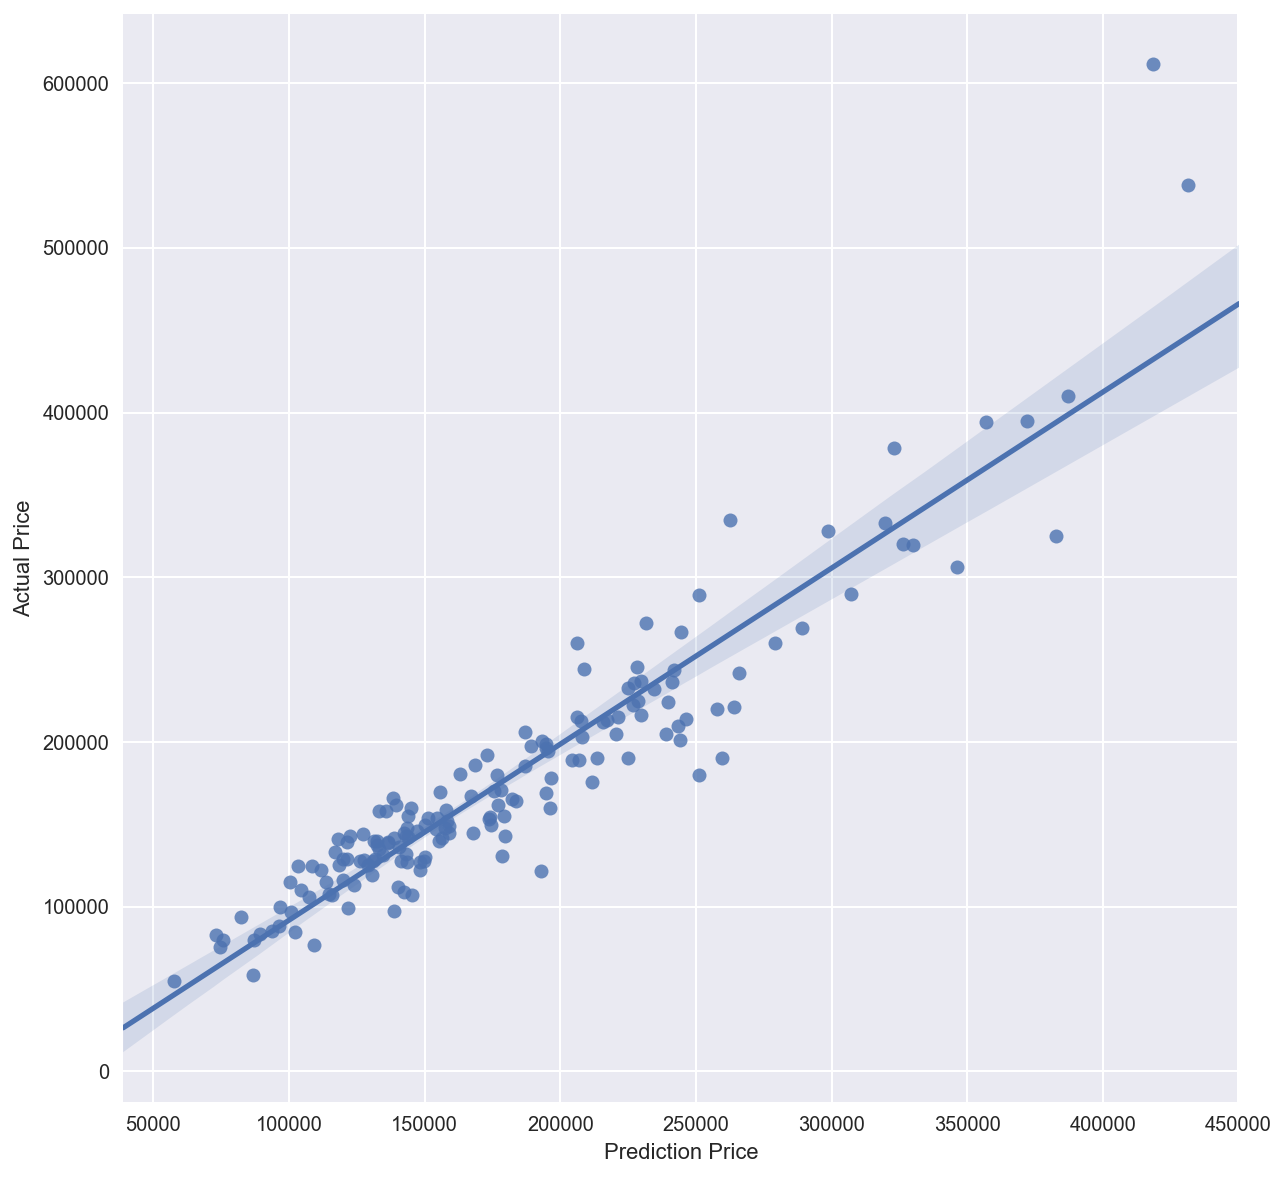

In [632]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (10,10)})
g = sns.regplot(predict, yTest)
g.set(xlabel='Prediction Price', ylabel='Actual Price')
plt.show(g)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

* Fitting the entire dataset into lasso model and compare the score in question 1

In [633]:
# Create dummy variables for entire dataset
housE = pd.get_dummies(house)
housE.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice,mszoning_RH,mszoning_RL,mszoning_RM,street_Grvl,street_Pave,alley_Grvl,alley_None,alley_Pave,lotshape_IR1,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_Bnk,landcontour_HLS,landcontour_Low,landcontour_Lvl,utilities_AllPub,utilities_NoSeWa,lotconfig_Corner,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,landslope_Gtl,landslope_Mod,landslope_Sev,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Artery,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Artery,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_1Fam,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Fin,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Flat,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_ClyTile,roofmatl_CompShg,roofmatl_Membran,roofmatl_Metal,roofmatl_Roll,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsbShng,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsbShng,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Other,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,masvnrtype_BrkCmn,masvnrtype_BrkFace,masvnrtype_None,masvnrtype_Stone,exterqual_Ex,exterqual_Fa,exterqual_Gd,exterqual_TA,extercond_Ex,extercond_Fa,extercond_Gd,extercond_Po,extercond_TA,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtqual_Ex,bsmtqual_Fa,bsmtqual_Gd,bsmtqual_None,bsmtqual_TA,bsmtcond_Fa,bsmtcond_Gd,bsmtcond_None,bsmtcond_Po,bsmtcond_TA,bsmtexposure_Av,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_No,bsmtexposure_None,bsmtfintype1_ALQ,bsmtfintype1_BLQ,bsmtfintype1_GLQ,bsmtfintype1_LwQ,bsmtfintype1_None,bsmtfintype1_Rec,bsmtfintype1_Unf,bsmtfintype2_ALQ,bsmtfintype2_BLQ,bsmtfintype2_GLQ,bsmtfintype2_LwQ,bsmtfintype2_None,bsmtfintype2_Rec,bsmtfintype2_Unf,heating_Floor,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,heatingqc_Ex,heatingqc_Fa,heatingqc_Gd,heatingqc_Po,heatingqc_TA,centralair_N,centralair_Y,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,kitchenqual_Ex,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,functional_Maj1,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sev,functional_Typ,fireplacequ_Ex,fireplacequ_Fa,fireplacequ_Gd,fireplacequ_None,fireplacequ_Po,fireplacequ_TA,garagetype_2Types,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_None,gar

In [634]:
# Training set
before_2010 = housE[housE['yrsold']<2010]
y2 = before_2010['saleprice']
X2 = before_2010.drop(['id', 'saleprice'], axis=1)

# Testing set
on_2010 = housE[housE['yrsold']== 2010]
yTest2 = on_2010['saleprice']
XTest2 = on_2010.drop(['id', 'saleprice'], axis=1)

In [635]:
# Scaling the predictors
X2 = ss.fit_transform(X2)
XTest2 = ss.fit_transform(XTest2)

In [636]:
# Optimizing alpha and fitting model
optimal_lasso2 = LassoCV(n_alphas=500, cv=5, verbose=1)
optimal_lasso2.fit(X2, y2)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

1219.88233563


.........................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s finished


In [637]:
# Lasso score
lasso2_scores = cross_val_score(optimal_lasso2, X2, y2, cv=10)

print lasso2_scores
print np.mean(lasso2_scores)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

[ 0.9233365   0.86883344  0.91258403  0.72115684  0.89166802  0.73408025
  0.91150262  0.87154864  0.57950096  0.90223096]
0.83164422473


....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished


In [638]:
col = list(before_2010.columns)
del col[0]
del col[36]

In [648]:
# Finding best lasso coefficients
lasso2_coefs = pd.DataFrame({'variable':col,
                            'coef':optimal_lasso2.coef_,
                            'abs_coef':np.abs(optimal_lasso2.coef_)})

lasso2_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso2_coefs

,abs_coef,coef,variable
15,26186.247718,26186.247718,grlivarea
123,14166.687643,-14166.687643,roofmatl_ClyTile
3,13049.583665,13049.583665,overallqual
181,6857.529052,6857.529052,bsmtqual_Ex
100,6718.536426,-6718.536426,condition2_PosN
77,6545.782097,6545.782097,neighborhood_NoRidge
228,5888.659807,5888.659807,kitchenqual_Ex
8,5881.195530,5881.195530,bsmtfinsf1
5,5619.074825,5619.074825,yearbuilt
11,5458.364413,5458.364413,totalbsmtsf


In [649]:
prediction = optimal_lasso2.predict(XTest2)
compare = pd.DataFrame(yTest2)

In [659]:
compare['prediction'] = prediction
compare['residual'] = compare['prediction']- compare['saleprice']
compare

,saleprice,prediction,residual
16,149000,159659.235110,10659.235110
24,154000,148856.244177,-5143.755823
26,134800,131110.883067,-3689.116933
27,306000,304009.284533,-1990.715467
33,165500,185937.351927,20437.351927
38,109000,133196.418502,24196.418502
45,319900,334380.312848,14480.312848
52,110000,119320.520529,9320.520529
63,140000,152447.661915,12447.661915
66,180000,259861.778010,79861.778010


## Comparison of scores

In [660]:
# Top 10 coefficients for qn 1
lasso_coefs['variable'][0:10]

8                 grlivarea
134             bsmtqual_Ex
79     neighborhood_NridgHt
78     neighborhood_NoRidge
18               garagecars
3              yearremodadd
85     neighborhood_StoneBr
5               totalbsmtsf
2                 yearbuilt
16               fireplaces
Name: variable, dtype: object

In [642]:
# Top 10 coefficients for qn 2
lasso2_coefs['variable'][0:10]

15                grlivarea
123        roofmatl_ClyTile
3               overallqual
181             bsmtqual_Ex
100         condition2_PosN
77     neighborhood_NoRidge
228          kitchenqual_Ex
8                bsmtfinsf1
5                 yearbuilt
11              totalbsmtsf
Name: variable, dtype: object

In [644]:
without_reno = np.mean(lasso_scores)

with_reno = np.mean(lasso2_scores)

print with_reno-without_reno

0.0327826827177


* Renovatable features does not make a difference to the saleprice of houses. But 
* living area above grade is the main determinant of saleprice as it has best result in both models
* The company should focus on purcasing and flippinh houses at NoRidge neighborhood
* The company should also change the roofs made of clay as it will affect the saleprice significantly.

* Do I trust my model??
       Probably not as 5 features in my model affect my saleprice even though the difference in scores for both
       qns are insignificant

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

## 1. Classification problem
## 2. SaleCondition will be group into 2 classes, abnormal is one class and other values are one class 
## 3. Perform logistic regression